In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv('/home/bk/Desktop/mlai/Notes/Day 24/train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [11]:
le = preprocessing.LabelEncoder()
dataset['Embarked']=le.fit_transform(dataset['Embarked'])
dataset['Sex'] = le.fit_transform(dataset['Sex'])
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [12]:
dataset.drop(['Name','PassengerId','Cabin','Ticket'],axis=1,inplace=True)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [15]:
X = dataset.drop(['Pclass'],axis=1)
y=dataset[['Pclass']]
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state =0, test_size=0.3)
k_values, accuracy_scores = [],[]

In [24]:
def knn_for_kvalue(k_value):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k_value)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print('k value: '+ str(k_value))
    print('accuracy score: '+ str(accuracy_score(y_test, y_pred,normalize=True)))
    k_values.append(k_value)
    accuracy_scores.append(accuracy_score(y_test, y_pred,normalize=True))
    print('confusion matrix: ')
    print(confusion_matrix(y_test, y_pred))
    


In [26]:
for k in range(1,268):
    print('=========================================================')
    knn_for_kvalue(k)
    print('=========================================================')

k value: 1
accuracy score: 0.8913857677902621
confusion matrix: 
[[ 62   6   2]
 [  3  37   9]
 [  1   8 139]]
k value: 2
accuracy score: 0.8651685393258427
confusion matrix: 
[[ 67   2   1]
 [  8  37   4]
 [  4  17 127]]
k value: 3
accuracy score: 0.8651685393258427
confusion matrix: 
[[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]
k value: 4
accuracy score: 0.8239700374531835
confusion matrix: 
[[ 61   7   2]
 [  8  30  11]
 [  4  15 129]]
k value: 5
accuracy score: 0.8314606741573034
confusion matrix: 
[[ 58  10   2]
 [  7  28  14]
 [  3   9 136]]
k value: 6
accuracy score: 0.846441947565543
confusion matrix: 
[[ 64   5   1]
 [  7  32  10]
 [  3  15 130]]
k value: 7
accuracy score: 0.8426966292134831
confusion matrix: 
[[ 59  10   1]
 [  7  28  14]
 [  3   7 138]]
k value: 8
accuracy score: 0.850187265917603
confusion matrix: 
[[ 61   8   1]
 [  7  34   8]
 [  3  13 132]]
k value: 9
accuracy score: 0.846441947565543
confusion matrix: 
[[ 60   8   2]
 [  7  29  13]
 [  3   8 137]]
k va

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 14
accuracy score: 0.8202247191011236
confusion matrix: 
[[ 60   8   2]
 [  8  27  14]
 [  5  11 132]]
k value: 15
accuracy score: 0.8127340823970037
confusion matrix: 
[[ 60   7   3]
 [  7  27  15]
 [  5  13 130]]
k value: 16
accuracy score: 0.8164794007490637
confusion matrix: 
[[ 60   7   3]
 [  7  28  14]
 [  5  13 130]]
k value: 17
accuracy score: 0.8164794007490637
confusion matrix: 
[[ 60   7   3]
 [  7  27  15]
 [  5  12 131]]
k value: 18
accuracy score: 0.8164794007490637
confusion matrix: 
[[ 60   6   4]
 [  7  27  15]
 [  5  12 131]]
k value: 19
accuracy score: 0.8202247191011236
confusion matrix: 
[[ 60   6   4]
 [  7  28  14]
 [  5  12 131]]
k value: 20
accuracy score: 0.8202247191011236
confusion matrix: 
[[ 60   6   4]
 [  7  29  13]
 [  5  13 130]]
k value: 21
accuracy score: 0.8127340823970037
confusion matrix: 
[[ 60   7   3]
 [  7  27  15]
 [  5  13 130]]
k value: 22
accuracy score: 0.797752808988764
confusion matrix: 
[[ 61   6   3]
 [  7  27  15]
 [  9  14

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

confusion matrix: 
[[ 62   5   3]
 [  7  26  16]
 [  9  14 125]]
k value: 28
accuracy score: 0.7827715355805244
confusion matrix: 
[[ 62   5   3]
 [  7  24  18]
 [ 10  15 123]]
k value: 29
accuracy score: 0.7790262172284644
confusion matrix: 
[[ 62   5   3]
 [  7  24  18]
 [ 10  16 122]]
k value: 30
accuracy score: 0.7790262172284644
confusion matrix: 
[[ 62   5   3]
 [  7  24  18]
 [ 10  16 122]]
k value: 31
accuracy score: 0.7865168539325843
confusion matrix: 
[[ 62   5   3]
 [  7  24  18]
 [  9  15 124]]
k value: 32
accuracy score: 0.7827715355805244
confusion matrix: 
[[ 62   5   3]
 [  7  23  19]
 [  9  15 124]]
k value: 33
accuracy score: 0.7902621722846442
confusion matrix: 
[[ 62   5   3]
 [  7  23  19]
 [  9  13 126]]
k value: 34
accuracy score: 0.7865168539325843
confusion matrix: 
[[ 62   5   3]
 [  7  24  18]
 [ 10  14 124]]
k value: 35
accuracy score: 0.7790262172284644
confusion matrix: 
[[ 62   5   3]
 [  7  22  20]
 [ 10  14 124]]
k value: 36
accuracy score: 0.782771535

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 40
accuracy score: 0.7902621722846442
confusion matrix: 
[[ 62   5   3]
 [  7  20  22]
 [  7  12 129]]
k value: 41
accuracy score: 0.7827715355805244
confusion matrix: 
[[ 61   5   4]
 [  7  19  23]
 [  7  12 129]]
k value: 42
accuracy score: 0.7865168539325843
confusion matrix: 
[[ 61   5   4]
 [  7  20  22]
 [  7  12 129]]
k value: 43
accuracy score: 0.7827715355805244
confusion matrix: 
[[ 61   6   3]
 [  7  19  23]
 [  7  12 129]]
k value: 44
accuracy score: 0.7865168539325843
confusion matrix: 
[[ 61   7   2]
 [  7  20  22]
 [  7  12 129]]
k value: 45
accuracy score: 0.7827715355805244
confusion matrix: 
[[ 61   7   2]
 [  7  19  23]
 [  7  12 129]]
k value: 46
accuracy score: 0.7865168539325843
confusion matrix: 
[[ 61   7   2]
 [  7  20  22]
 [  7  12 129]]
k value: 47
accuracy score: 0.7752808988764045
confusion matrix: 
[[ 61   6   3]
 [  7  17  25]
 [  7  12 129]]
k value: 48
accuracy score: 0.7752808988764045
confusion matrix: 
[[ 61   6   3]
 [  7  17  25]
 [  7  1

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 53
accuracy score: 0.7677902621722846
confusion matrix: 
[[ 61   6   3]
 [  7  12  30]
 [  5  11 132]]
k value: 54
accuracy score: 0.7677902621722846
confusion matrix: 
[[ 61   6   3]
 [  7  12  30]
 [  5  11 132]]
k value: 55
accuracy score: 0.7715355805243446
confusion matrix: 
[[ 61   6   3]
 [  7  12  30]
 [  5  10 133]]
k value: 56
accuracy score: 0.7752808988764045
confusion matrix: 
[[ 62   5   3]
 [  7  12  30]
 [  5  10 133]]
k value: 57
accuracy score: 0.7752808988764045
confusion matrix: 
[[ 62   5   3]
 [  7  12  30]
 [  5  10 133]]
k value: 58
accuracy score: 0.7677902621722846
confusion matrix: 
[[ 60   5   5]
 [  6  12  31]
 [  5  10 133]]
k value: 59
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 60   5   5]
 [  6  11  32]
 [  5  11 132]]
k value: 60
accuracy score: 0.7640449438202247
confusion matrix: 
[[ 60   5   5]
 [  6  12  31]
 [  5  11 132]]
k value: 61
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 60   5   5]
 [  6  11  32]
 [  5  1

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 65
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 58   6   6]
 [  5  11  33]
 [  5   9 134]]
k value: 66
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 57   6   7]
 [  5  11  33]
 [  5   9 134]]
k value: 67
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 57   6   7]
 [  5  11  33]
 [  5   8 135]]
k value: 68
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 57   6   7]
 [  5  11  33]
 [  5   8 135]]
k value: 69
accuracy score: 0.7640449438202247
confusion matrix: 
[[ 56   7   7]
 [  5  11  33]
 [  5   6 137]]
k value: 70
accuracy score: 0.7640449438202247
confusion matrix: 
[[ 57   6   7]
 [  5  11  33]
 [  5   7 136]]
k value: 71
accuracy score: 0.7640449438202247
confusion matrix: 
[[ 57   6   7]
 [  5  11  33]
 [  5   7 136]]
k value: 72
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 56   7   7]
 [  5  11  33]
 [  5   8 135]]
k value: 73
accuracy score: 0.7640449438202247
confusion matrix: 
[[ 56   7   7]
 [  5  11  33]
 [  5   

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 76
accuracy score: 0.7677902621722846
confusion matrix: 
[[ 56   7   7]
 [  5  11  33]
 [  5   5 138]]
k value: 77
accuracy score: 0.7715355805243446
confusion matrix: 
[[ 57   6   7]
 [  5  11  33]
 [  5   5 138]]
k value: 78
accuracy score: 0.7640449438202247
confusion matrix: 
[[ 56   5   9]
 [  5  11  33]
 [  5   6 137]]
k value: 79
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 56   5   9]
 [  5  11  33]
 [  5   8 135]]
k value: 80
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 55   6   9]
 [  5  11  33]
 [  5   7 136]]
k value: 81
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 56   5   9]
 [  5  11  33]
 [  5   7 136]]
k value: 82
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 57   4   9]
 [  5  10  34]
 [  5   7 136]]
k value: 83
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 55   5  10]
 [  5  10  34]
 [  5   7 136]]
k value: 84
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 55   5  10]
 [  5  10  34]
 [  5   

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 87
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 55   6   9]
 [  5  10  34]
 [  5   8 135]]
k value: 88
accuracy score: 0.7453183520599251
confusion matrix: 
[[ 54   6  10]
 [  5  10  34]
 [  5   8 135]]
k value: 89
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 54   6  10]
 [  5  10  34]
 [  5   7 136]]
k value: 90
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 54   5  11]
 [  5  10  34]
 [  5   5 138]]
k value: 91
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 54   6  10]
 [  5  10  34]
 [  5   5 138]]
k value: 92
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 54   6  10]
 [  5  10  34]
 [  5   5 138]]
k value: 93
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 54   6  10]
 [  5  10  34]
 [  5   6 137]]
k value: 94
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 54   5  11]
 [  5  10  34]
 [  5   6 137]]
k value: 95
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 54   6  10]
 [  5  10  34]
 [  5   

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 98
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 54   6  10]
 [  5  10  34]
 [  5   5 138]]
k value: 99
accuracy score: 0.7378277153558053
confusion matrix: 
[[ 53   6  11]
 [  5  10  34]
 [  5   9 134]]
k value: 100
accuracy score: 0.7378277153558053
confusion matrix: 
[[ 53   6  11]
 [  5  10  34]
 [  5   9 134]]
k value: 101
accuracy score: 0.7303370786516854
confusion matrix: 
[[ 53   6  11]
 [  5  10  34]
 [  5  11 132]]
k value: 102
accuracy score: 0.7303370786516854
confusion matrix: 
[[ 53   5  12]
 [  5  10  34]
 [  5  11 132]]
k value: 103
accuracy score: 0.7340823970037453
confusion matrix: 
[[ 53   7  10]
 [  6  10  33]
 [  5  10 133]]
k value: 104
accuracy score: 0.7340823970037453
confusion matrix: 
[[ 53   7  10]
 [  6  10  33]
 [  5  10 133]]
k value: 105
accuracy score: 0.7378277153558053
confusion matrix: 
[[ 53   7  10]
 [  6  11  32]
 [  5  10 133]]
k value: 106
accuracy score: 0.7415730337078652
confusion matrix: 
[[ 53   6  11]
 [  5  12  32]
 

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 109
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 53   9   8]
 [  5  12  32]
 [  5   8 135]]
k value: 110
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 53   8   9]
 [  5  13  31]
 [  5   8 135]]
k value: 111
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 53   8   9]
 [  5  12  32]
 [  5   8 135]]
k value: 112
accuracy score: 0.7453183520599251
confusion matrix: 
[[ 53   8   9]
 [  5  12  32]
 [  5   9 134]]
k value: 113
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 53   8   9]
 [  5  12  32]
 [  5   8 135]]
k value: 114
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 53   9   8]
 [  5  12  32]
 [  5   8 135]]
k value: 115
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 53  11   6]
 [  5  12  32]
 [  5   8 135]]
k value: 116
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 53  11   6]
 [  5  12  32]
 [  5   8 135]]
k value: 117
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 53  11   6]
 [  5  12  32]

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 119
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 53  12   5]
 [  5  12  32]
 [  5   8 135]]
k value: 120
accuracy score: 0.7453183520599251
confusion matrix: 
[[ 53  12   5]
 [  5  11  33]
 [  5   8 135]]
k value: 121
accuracy score: 0.7453183520599251
confusion matrix: 
[[ 53  12   5]
 [  5  11  33]
 [  5   8 135]]
k value: 122
accuracy score: 0.7453183520599251
confusion matrix: 
[[ 53  12   5]
 [  5  11  33]
 [  5   8 135]]
k value: 123
accuracy score: 0.7415730337078652
confusion matrix: 
[[ 53  12   5]
 [  5  10  34]
 [  5   8 135]]
k value: 124
accuracy score: 0.7453183520599251
confusion matrix: 
[[ 53  13   4]
 [  5  11  33]
 [  5   8 135]]
k value: 125
accuracy score: 0.7453183520599251
confusion matrix: 
[[ 53  12   5]
 [  5  11  33]
 [  5   8 135]]
k value: 126
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 53  12   5]
 [  5  11  33]
 [  5   7 136]]
k value: 127
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 53  12   5]
 [  5  11  33]

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 129
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 53  12   5]
 [  5  11  33]
 [  5   6 137]]
k value: 130
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 53  12   5]
 [  5  11  33]
 [  5   4 139]]
k value: 131
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 53  12   5]
 [  5  11  33]
 [  5   4 139]]
k value: 132
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 53  13   4]
 [  5  11  33]
 [  5   4 139]]
k value: 133
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 53  13   4]
 [  5  11  33]
 [  5   4 139]]
k value: 134
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52  13   5]
 [  5  11  33]
 [  5   4 139]]
k value: 135
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 52  13   5]
 [  5  11  33]
 [  5   3 140]]
k value: 136
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 52  13   5]
 [  5  11  33]
 [  5   3 140]]
k value: 137
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 52  13   5]
 [  5  11  33]

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 139
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 52  13   5]
 [  5  11  33]
 [  5   3 140]]
k value: 140
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 52  13   5]
 [  5  11  33]
 [  5   3 140]]
k value: 141
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 52  13   5]
 [  5  11  33]
 [  5   3 140]]
k value: 142
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52  13   5]
 [  5  11  33]
 [  5   4 139]]
k value: 143
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52  13   5]
 [  5  11  33]
 [  5   4 139]]
k value: 144
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52  13   5]
 [  5  11  33]
 [  5   4 139]]
k value: 145
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52  13   5]
 [  5  11  33]
 [  5   4 139]]
k value: 146
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52  13   5]
 [  5  11  33]
 [  5   4 139]]
k value: 147
accuracy score: 0.7640449438202247
confusion matrix: 
[[ 52  13   5]
 [  5  11  33]

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 149
accuracy score: 0.7677902621722846
confusion matrix: 
[[ 52  11   7]
 [  5  11  33]
 [  5   1 142]]
k value: 150
accuracy score: 0.7677902621722846
confusion matrix: 
[[ 52  11   7]
 [  5  11  33]
 [  5   1 142]]
k value: 151
accuracy score: 0.7677902621722846
confusion matrix: 
[[ 52  11   7]
 [  5  11  33]
 [  5   1 142]]
k value: 152
accuracy score: 0.7640449438202247
confusion matrix: 
[[ 52  11   7]
 [  5  10  34]
 [  5   1 142]]
k value: 153
accuracy score: 0.7640449438202247
confusion matrix: 
[[ 52   9   9]
 [  5  10  34]
 [  5   1 142]]
k value: 154
accuracy score: 0.7640449438202247
confusion matrix: 
[[ 52   9   9]
 [  5  10  34]
 [  5   1 142]]
k value: 155
accuracy score: 0.7640449438202247
confusion matrix: 
[[ 52   9   9]
 [  5  10  34]
 [  5   1 142]]
k value: 156
accuracy score: 0.7602996254681648
confusion matrix: 
[[ 52   9   9]
 [  5   9  35]
 [  5   1 142]]


/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 157
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52   9   9]
 [  5   7  37]
 [  5   0 143]]
k value: 158
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52   9   9]
 [  5   7  37]
 [  5   0 143]]
k value: 159
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52   9   9]
 [  5   7  37]
 [  5   0 143]]
k value: 160
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52   9   9]
 [  5   7  37]
 [  5   0 143]]
k value: 161
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 52   9   9]
 [  5   6  38]
 [  5   0 143]]
k value: 162
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 52   9   9]
 [  5   6  38]
 [  5   0 143]]
k value: 163
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 52   9   9]
 [  5   6  38]
 [  5   0 143]]


/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 164
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 52   9   9]
 [  5   6  38]
 [  5   0 143]]
k value: 165
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 52   9   9]
 [  5   6  38]
 [  5   0 143]]
k value: 166
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 52   8  10]
 [  5   6  38]
 [  5   0 143]]
k value: 167
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 52   7  11]
 [  5   6  38]
 [  5   0 143]]
k value: 168
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 52   7  11]
 [  5   6  38]
 [  5   0 143]]
k value: 169
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 52   6  12]
 [  5   6  38]
 [  5   0 143]]
k value: 170
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 52   6  12]
 [  5   6  38]
 [  5   0 143]]
k value: 171
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 52   6  12]
 [  5   6  38]
 [  5   0 143]]
k value: 172
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 52   6  12]
 [  5   6  38]

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 173
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52   6  12]
 [  5   7  37]
 [  5   0 143]]
k value: 174
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 50   8  12]
 [  5   7  37]
 [  5   0 143]]
k value: 175
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52   6  12]
 [  5   7  37]
 [  5   0 143]]
k value: 176
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52   6  12]
 [  5   7  37]
 [  5   0 143]]
k value: 177
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52   6  12]
 [  5   7  37]
 [  5   0 143]]
k value: 178
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52   6  12]
 [  5   7  37]
 [  5   0 143]]
k value: 179
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52   6  12]
 [  5   7  37]
 [  5   0 143]]
k value: 180
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 50   7  13]
 [  5   7  37]
 [  5   0 143]]
k value: 181
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52   5  13]
 [  5   7  37]

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 182
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52   5  13]
 [  5   7  37]
 [  5   0 143]]
k value: 183
accuracy score: 0.7565543071161048
confusion matrix: 
[[ 52   5  13]
 [  5   7  37]
 [  5   0 143]]
k value: 184
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 51   5  14]
 [  5   7  37]
 [  5   0 143]]
k value: 185
accuracy score: 0.7528089887640449
confusion matrix: 
[[ 51   5  14]
 [  5   7  37]
 [  5   0 143]]
k value: 186
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 51   5  14]
 [  5   6  38]
 [  5   0 143]]
k value: 187
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 51   5  14]
 [  5   6  38]
 [  5   0 143]]
k value: 188
accuracy score: 0.7490636704119851
confusion matrix: 
[[ 51   5  14]
 [  5   6  38]
 [  5   0 143]]
k value: 189
accuracy score: 0.7453183520599251
confusion matrix: 
[[ 50   5  15]
 [  5   6  38]
 [  5   0 143]]
k value: 190
accuracy score: 0.7415730337078652
confusion matrix: 
[[ 50   5  15]
 [  5   5  39]

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 191
accuracy score: 0.7415730337078652
confusion matrix: 
[[ 50   5  15]
 [  5   5  39]
 [  5   0 143]]
k value: 192
accuracy score: 0.7415730337078652
confusion matrix: 
[[ 50   5  15]
 [  5   5  39]
 [  5   0 143]]
k value: 193
accuracy score: 0.7415730337078652
confusion matrix: 
[[ 50   5  15]
 [  5   5  39]
 [  5   0 143]]
k value: 194
accuracy score: 0.7303370786516854
confusion matrix: 
[[ 48   7  15]
 [  5   4  40]
 [  5   0 143]]
k value: 195
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   7  15]
 [  5   2  42]
 [  5   0 143]]
k value: 196
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   7  15]
 [  5   2  42]
 [  5   0 143]]
k value: 197
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   7  15]
 [  5   2  42]
 [  5   0 143]]


/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 198
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   7  15]
 [  5   2  42]
 [  5   0 143]]
k value: 199
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   7  15]
 [  5   1  43]
 [  5   0 143]]
k value: 200
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   6  16]
 [  5   1  43]
 [  5   0 143]]
k value: 201
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   6  16]
 [  5   2  42]
 [  5   0 143]]
k value: 202
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
k value: 203
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
k value: 204
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
k value: 205
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
k value: 206
accuracy score: 0.7228464419475655
confusion matrix: 


/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

[[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
k value: 207
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
k value: 208
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
k value: 209
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   6  16]
 [  4   2  43]
 [  5   0 143]]
k value: 210
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   5  17]
 [  4   2  43]
 [  5   0 143]]
k value: 211
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   5  17]
 [  4   2  43]
 [  5   0 143]]
k value: 212
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   4  18]
 [  4   2  43]
 [  5   0 143]]
k value: 213
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   4  18]
 [  4   2  43]
 [  5   0 143]]


/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 214
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   4  18]
 [  4   2  43]
 [  5   0 143]]
k value: 215
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   4  18]
 [  4   2  43]
 [  5   0 143]]
k value: 216
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   4  18]
 [  4   2  43]
 [  5   0 143]]
k value: 217
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   4  18]
 [  4   2  43]
 [  5   0 143]]
k value: 218
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   4  18]
 [  4   2  43]
 [  5   0 143]]
k value: 219
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]
k value: 220
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   3  19]
 [  4   2  43]
 [  5   0 143]]
k value: 221
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]


/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 222
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]
k value: 223
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]
k value: 224
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]
k value: 225
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]
k value: 226
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]
k value: 227
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]
k value: 228
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]
k value: 229
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   2  20]
 [  4   2  43]
 [  5   0 143]]


/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 230
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   1  21]
 [  4   2  43]
 [  5   0 143]]
k value: 231
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]
k value: 232
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]
k value: 233
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]
k value: 234
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]
k value: 235
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]
k value: 236
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]
k value: 237
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]


/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 238
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]
k value: 239
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]
k value: 240
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]
k value: 241
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]
k value: 242
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]
k value: 243
accuracy score: 0.7228464419475655
confusion matrix: 
[[ 48   0  22]
 [  4   2  43]
 [  5   0 143]]
k value: 244
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 245
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]


/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 246
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 247
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 248
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 249
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 250
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 251
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 252
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 253
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]


/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 254
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 255
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 256
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 257
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 258
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 259
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 260
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 261
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]


/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3

k value: 262
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 263
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 264
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 265
accuracy score: 0.7191011235955056
confusion matrix: 
[[ 48   0  22]
 [  4   1  44]
 [  5   0 143]]
k value: 266
accuracy score: 0.7153558052434457
confusion matrix: 
[[ 47   0  23]
 [  4   1  44]
 [  5   0 143]]
k value: 267
accuracy score: 0.7153558052434457
confusion matrix: 
[[ 47   1  22]
 [  4   1  44]
 [  5   0 143]]


/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


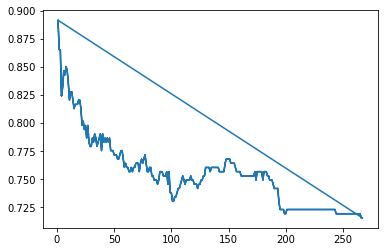

In [29]:
plt.plot(k_values,accuracy_scores)
plt.show()

In [46]:
best_accuracy = max(accuracy_scores)
best_k_index = accuracy_scores.index(best_accuracy)
print('Best accuracy = '+str(best_accuracy*100) +'% for k value : '+ str(k_values[best_k_index]))


Best accuracy = 89.13857677902621% for k value : 1
